# [Introduction to `matplotlib`](https://www.datacamp.com/completed/statement-of-accomplishment/course/e30d4b8534a8522df3fbdcdd05c79104e2f0ea92)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/courses/introduction_to_matplotlib/notebook.ipynb)
[![Render nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/datacamp/blob/main/notebooks/courses/introduction_to_matplotlib/notebook.ipynb)

**Contents**
* [Introduction](#Introduction)
* [Time-series Data](#Time-series-Data)
* [Quantitative Comparisons](#Quantitative-Comparisons)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

austin_weather = pd.read_csv('austin_weather.csv', index_col=0)
seattle_weather = pd.read_csv('seattle_weather.csv', index_col=0)

climate_change = pd.read_csv(
  'climate_change.csv',
  parse_dates=['date'],
  index_col=0,
)

medals = pd.read_csv('medals.csv', index_col=0)
mens_rowing = pd.read_csv('mens_rowing.csv', index_col=0)
mens_gymnastics = pd.read_csv('mens_gymnastics.csv', index_col=0)


## Introduction

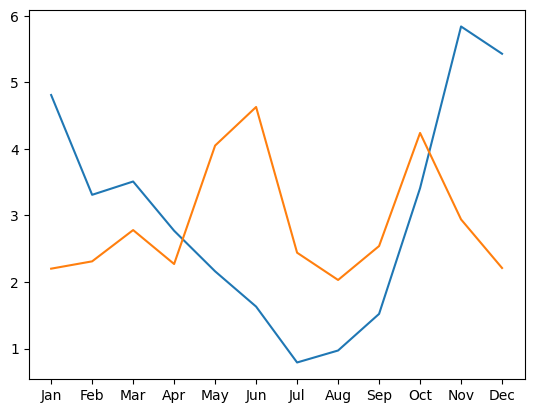

In [2]:
# create a figure and axes
fig, ax = plt.subplots()

# plot `MLY-PRCP-NORMAL` against `MONTH` for seattle
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# plot `MLY-PRCP-NORMAL` against `MONTH` for austin
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])
plt.show()


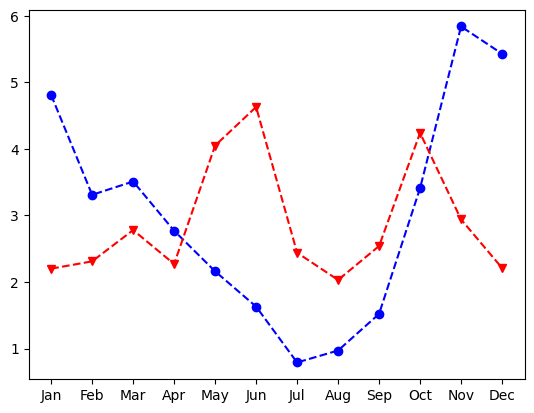

In [3]:
fig, ax = plt.subplots()

# plot seattle data using blue circles
ax.plot(
    seattle_weather["MONTH"],
    seattle_weather["MLY-PRCP-NORMAL"],
    linestyle="--",
    color="b",
    marker="o",
)

# plot austin data using red downward triangles
ax.plot(
    austin_weather["MONTH"],
    austin_weather["MLY-PRCP-NORMAL"],
    linestyle="--",
    color="r",
    marker="v",
)
plt.show()


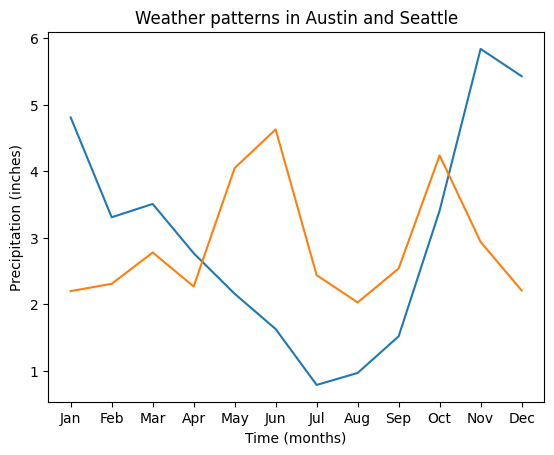

In [4]:
fig, ax = plt.subplots()

ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# customize x-axis label
ax.set_xlabel("Time (months)")

# customize y-axis label
ax.set_ylabel("Precipitation (inches)")

# add the title
ax.set_title("Weather patterns in Austin and Seattle")
plt.show()


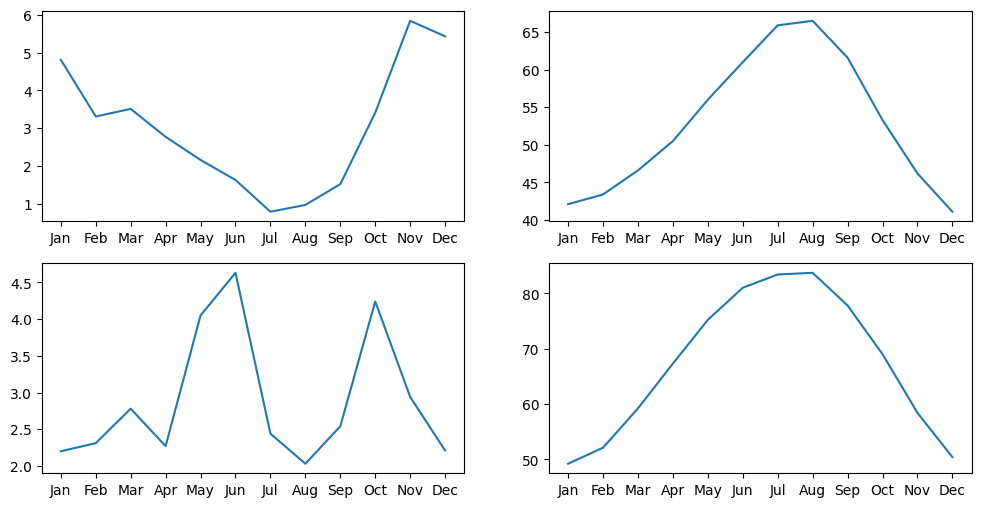

In [5]:
# 2 rows 2 columns
fig, ax = plt.subplots(2, 2)

# plot month and Seattle precipitation in top left
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# plot month and Seattle temperatures in top right
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])

# plot month and Austin precipitation in bottom left
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# plot month and Austin temperatures in bottom right
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])

# make the figure bigger
fig.set_size_inches([12, 6])
plt.show()


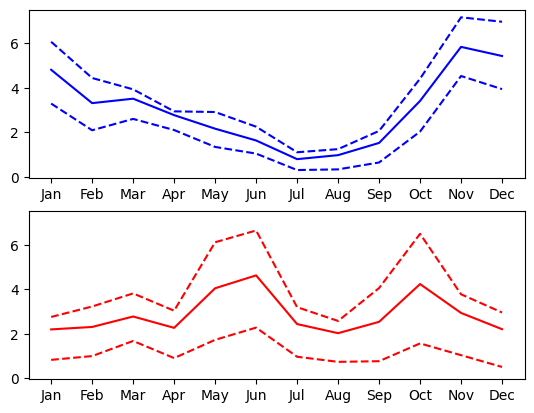

In [6]:
# 2 rows 1 columns with shared y-axis
fig, ax = plt.subplots(2, 1, sharey=True)

# plot Seattle precip on top axes in solid blue line
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color="b")

# add `MLY-PRCP-25PCTL` and `MLY-PRCP-75PCTL` in dashed blue
ax[0].plot(
    seattle_weather["MONTH"],
    seattle_weather["MLY-PRCP-25PCTL"],
    color="b",
    linestyle="--",
)
ax[0].plot(
    seattle_weather["MONTH"],
    seattle_weather["MLY-PRCP-75PCTL"],
    color="b",
    linestyle="--",
)

# plot Austin precip on bottom axes in solid red line
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color="r")

# add `MLY-PRCP-25PCTL` and `MLY-PRCP-75PCTL` in dashed red
ax[1].plot(
    austin_weather["MONTH"],
    austin_weather["MLY-PRCP-25PCTL"],
    color="r",
    linestyle="--",
)
ax[1].plot(
    austin_weather["MONTH"],
    austin_weather["MLY-PRCP-75PCTL"],
    color="r",
    linestyle="--",
)
plt.show()


## Time-series Data

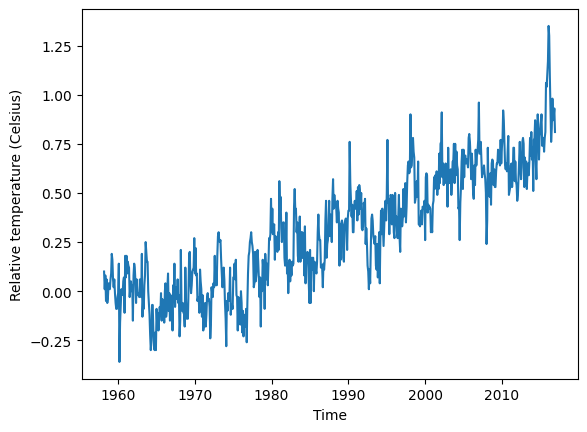

In [7]:
fig, ax = plt.subplots()

# add `relative_temp` time-series to the plot
ax.plot(climate_change.index, climate_change["relative_temp"])

# label x-axis "Time"
ax.set_xlabel("Time")

# label y-axis "Relative temperature (Celsius)"
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()


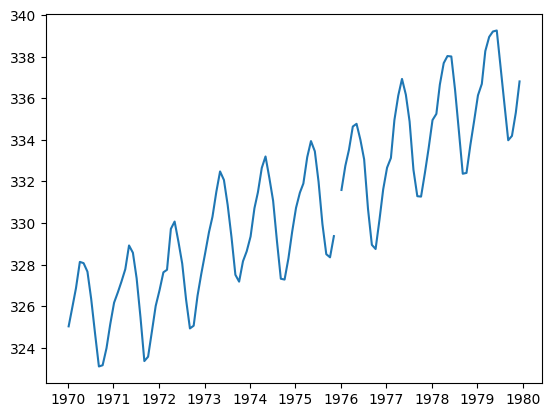

In [8]:
fig, ax = plt.subplots()

# get 1970's data
seventies = climate_change["1970-01-01":"1979-12-31"]

# add `co2` from seventies to the plot
ax.plot(seventies.index, seventies["co2"])
plt.show()


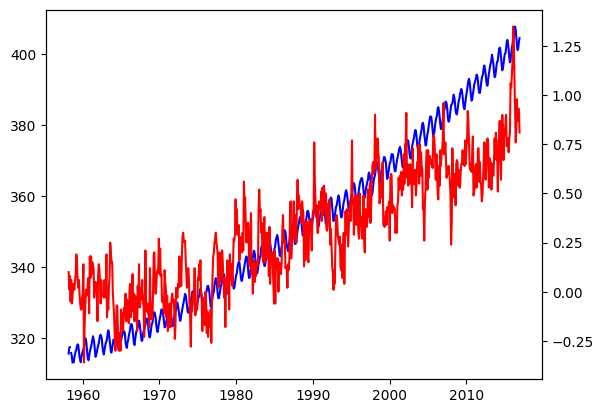

In [9]:
fig, ax = plt.subplots()

# plot `co2` in blue
ax.plot(climate_change.index, climate_change["co2"], color="b")

# create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# plot `relative_temp` in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color="r")
plt.show()


In [10]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    """
    1. plot inputs in provided color
    2. set x-axis label
    3. set y-axis label with color
    4. set tick params for y-axis
    """
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params("y", colors=color)


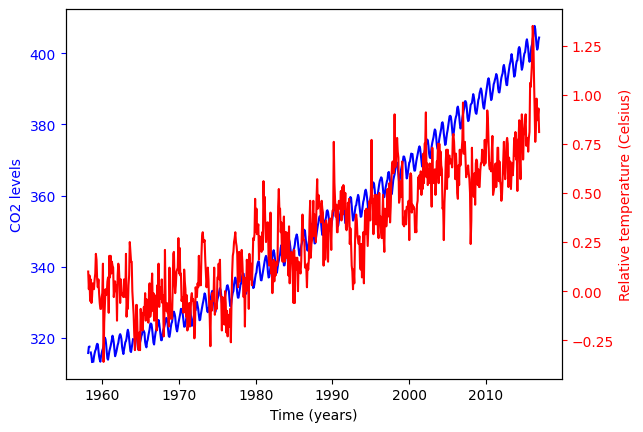

In [11]:
fig, ax = plt.subplots()

# plot `co2` in blue with labels "Time (years)" and "CO2 levels"
plot_timeseries(
    ax,
    climate_change.index,
    climate_change["co2"],
    "blue",
    "Time (years)",
    "CO2 levels",
)

# create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# plot `relative_temp` in red with labels "Time (years)" and "Relative temperature (Celsius)"
plot_timeseries(
    ax2,
    climate_change.index,
    climate_change["relative_temp"],
    "red",
    "Time (years)",
    "Relative temperature (Celsius)",
)
plt.show()


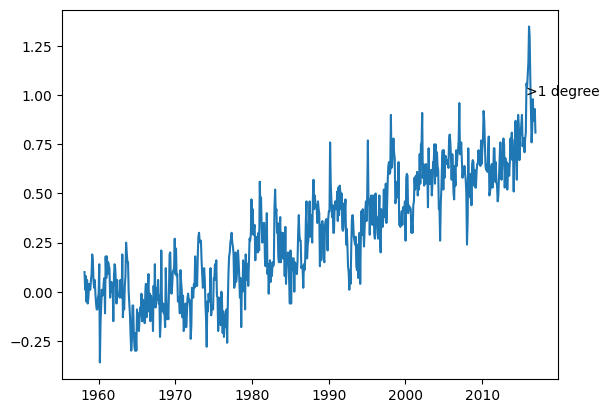

In [12]:
fig, ax = plt.subplots()

# plot `relative_temp`
ax.plot(climate_change.index, climate_change["relative_temp"])

# annotate 2015-10-06 with ">1 degree"
ax.annotate(
    ">1 degree",
    xy=(pd.Timestamp("2015-10-06"), 1),
)
plt.show()


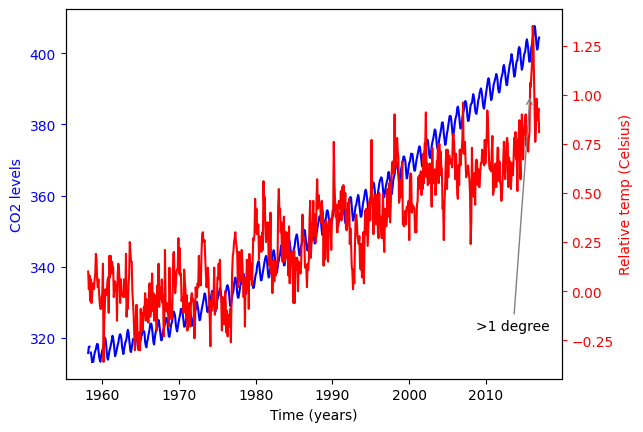

In [13]:
fig, ax = plt.subplots()

# plot `co2` in blue with labels "Time (years)" and "CO2 levels"
plot_timeseries(
    ax,
    climate_change.index,
    climate_change["co2"],
    "blue",
    "Time (years)",
    "CO2 levels",
)

# create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# plot `relative_temp` in red with labels "Time (years)" and "Relative temp (Celsius)"
plot_timeseries(
    ax2,
    climate_change.index,
    climate_change["relative_temp"],
    "red",
    "Time (years)",
    "Relative temp (Celsius)",
)

# annotate with the text ">1 degree" in `x=pd.Timestamp('2008-10-06'), y=-0.2`
# point with a gray thin arrow to `x=pd.Timestamp('2015-10-06'), y = 1`
ax2.annotate(
    ">1 degree",
    xytext=(pd.Timestamp("2008-10-06"), -0.2),
    xy=(pd.Timestamp("2015-10-06"), 1),
    arrowprops={"arrowstyle": "->", "color": "gray"},
)
plt.show()


## Quantitative Comparisons

### Bar Charts

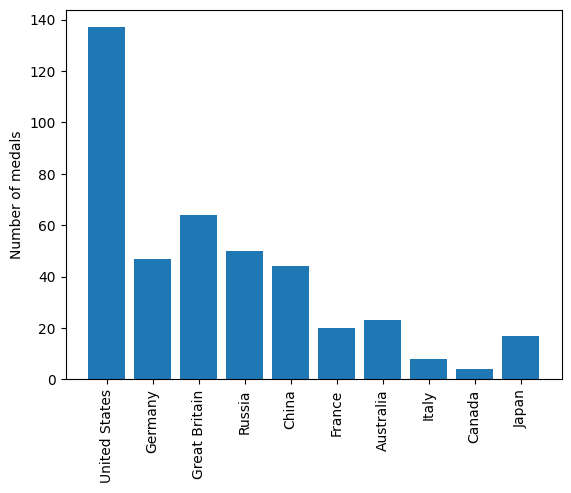

In [14]:
fig, ax = plt.subplots()

# plot gold medals as a function of country
ax.bar(medals.index, medals["Gold"])

# set x-axis tick labels to country names and rotate 90
# (need to set ticks before labels)
ax.set_xticks(range(len(medals.index)))
ax.set_xticklabels(medals.index, rotation=90)

# set y-axis label to "Number of medals"
ax.set_ylabel("Number of medals")
plt.show()


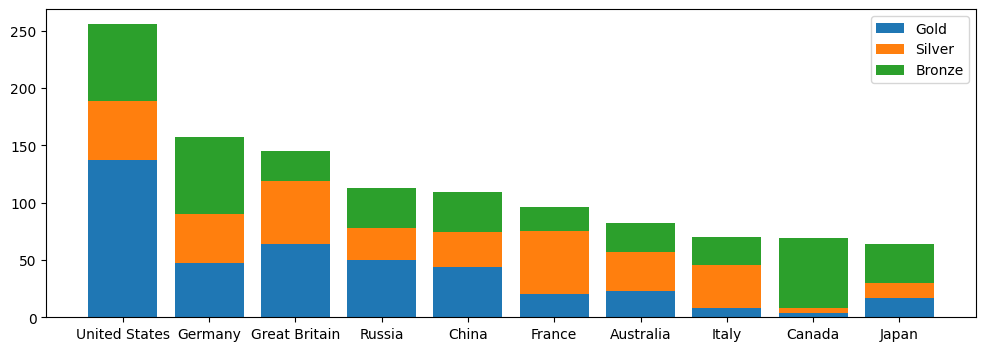

In [15]:
fig, ax = plt.subplots()

# add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold")

# stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")

# stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(
    medals.index,
    medals["Bronze"],
    bottom=medals["Gold"] + medals["Silver"],
    label="Bronze",
)

# display the legend
ax.legend()

# make wider
fig.set_size_inches([12, 4])
plt.show()


### Histograms

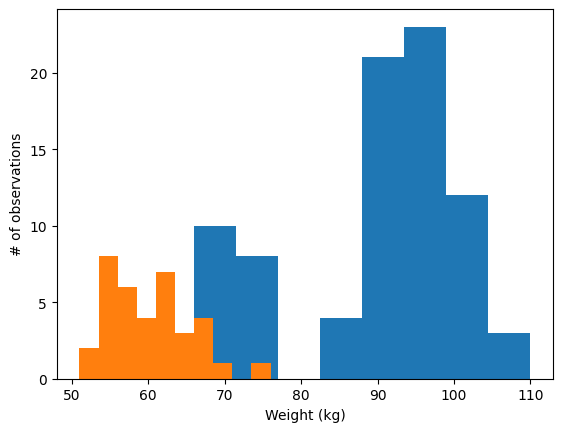

In [16]:
fig, ax = plt.subplots()

# plot histogram of "Weight" for `mens_rowing`
ax.hist(mens_rowing["Weight"])

# compare to histogram of "Weight" for `mens_gymnastics`
ax.hist(mens_gymnastics["Weight"])

# set labels
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")
plt.show()


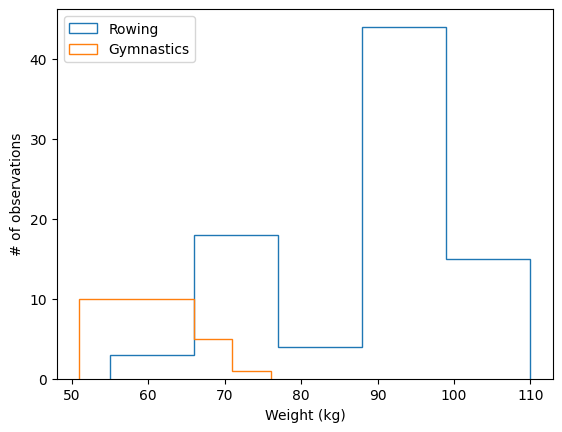

In [17]:
fig, ax = plt.subplots()

# plot a histogram of "Weight" for `mens_rowing`
ax.hist(mens_rowing["Weight"], label="Rowing", histtype="step", bins=5)

# compare to histogram of "Weight" for `mens_gymnastics`
ax.hist(mens_gymnastics["Weight"], label="Gymnastics", histtype="step", bins=5)

# set labels
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# add legend
ax.legend()
plt.show()


### Error Bars

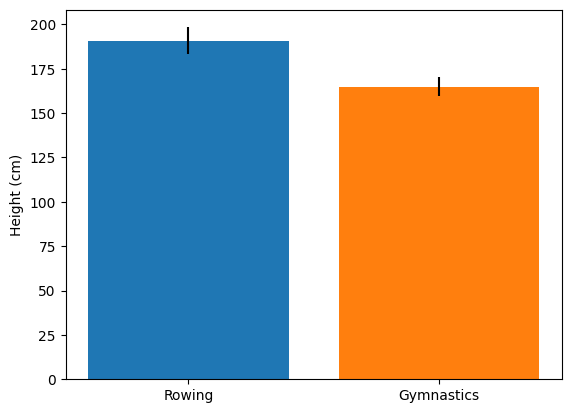

In [18]:
fig, ax = plt.subplots()

# add bar for rowing height mean and error bar of its std dev
ax.bar(
    "Rowing",
    mens_rowing["Height"].mean(),
    yerr=mens_rowing["Height"].std(),
)

# add bar for gymnastics height mean and error bar of its std dev
ax.bar(
    "Gymnastics",
    mens_gymnastics["Height"].mean(),
    yerr=mens_gymnastics["Height"].std(),
)

# label axes
ax.set_ylabel("Height (cm)")
plt.show()


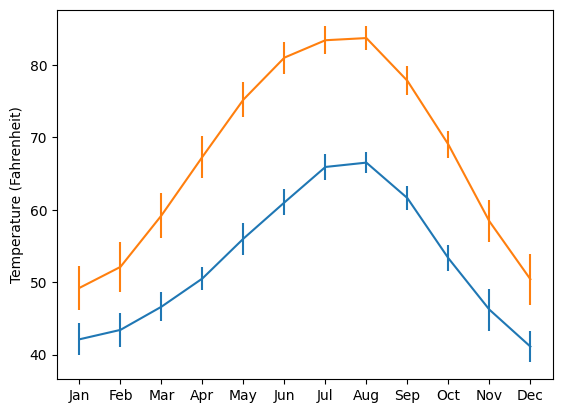

In [19]:
fig, ax = plt.subplots()

# add Seattle temperature data in each month with error bars
ax.errorbar(
    seattle_weather["MONTH"],
    seattle_weather["MLY-TAVG-NORMAL"],
    yerr=seattle_weather["MLY-TAVG-STDDEV"],
)

# add Austin temperature data in each month with error bars
ax.errorbar(
    austin_weather["MONTH"],
    austin_weather["MLY-TAVG-NORMAL"],
    yerr=austin_weather["MLY-TAVG-STDDEV"],
)

# set label
ax.set_ylabel("Temperature (Fahrenheit)")
plt.show()


### Box Plots

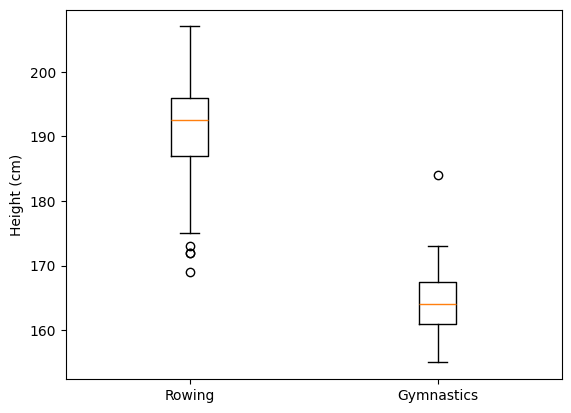

In [20]:
fig, ax = plt.subplots()

# plot height for rowing and gymnastics
# (`mens_rowing` on the left, `mens_gymnastics` on the right)
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# set x-axis tick labels
ax.set_xticklabels(["Rowing", "Gymnastics"])
ax.set_ylabel("Height (cm)")
plt.show()


### Scatter Plots

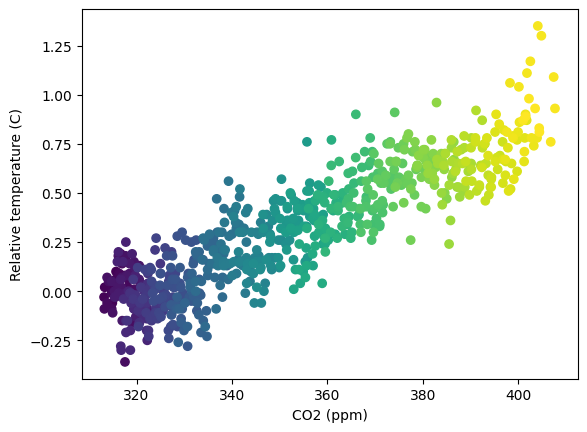

In [21]:
fig, ax = plt.subplots()

# plot `co2` on the x-axis and `relative_temp` on the y-axis
# use the index for color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

# set labels
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")
plt.show()
